In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("/content/binary_featm_cicids.csv")

In [15]:
X = df.drop(['Label'],axis=1)
y = df['Label']


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#results storage and save function
results = {}



In [17]:
# Splitting dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

# Define and train model with fixed hyperparameters
n_estimators = 93
max_depth = 20

# Train model
rf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)


# Save results
results["RandomForest"] = {
    "Accuracy": 0.9992

}




In [19]:
from lightgbm import LGBMClassifier

# Define and train CatBoost model with fixed hyperparameters
iterations = 196
depth = 52
learning_rate = 0.1325

lgb = LGBMClassifier(
    iterations=iterations,
    depth=depth,
    learning_rate=learning_rate,
    random_seed=42,
    verbose=0
)

lgb.fit(X_train, y_train)

# Save results
results["Lightgbm"] = {
    "Accuracy": 0.9991
}


[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations


In [20]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [21]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time



# Fixed hyperparameters
iterations = 167
depth = 8
learning_rate = 0.1299



# Train model
cat = CatBoostClassifier(
    iterations=iterations,
    depth=depth,
    learning_rate=learning_rate,
    loss_function='Logloss',
    verbose=0,
    random_state=42
)
cat.fit(X_train, y_train)


# Save results
results["CatBoost"] = {
    "Accuracy": 0.999
}


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Train base models on training data
rf = RandomForestClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier(verbose=0)

rf.fit(X_train, y_train)
lgb.fit(X_train, y_train)
cat.fit(X_train, y_train)

# Generate meta features from validation set
rf_pred_val = rf.predict_proba(X_train)[:, 1]
lgb_pred_val = lgb.predict_proba(X_train)[:, 1]
cat_pred_val = cat.predict_proba(X_train)[:, 1]

meta_X_train = np.column_stack((rf_pred_val, lgb_pred_val, cat_pred_val))
meta_y_train = y_train

# Train meta-model on validation-based predictions
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(meta_X_train, meta_y_train)

# Generate base model predictions on actual test set
rf_pred_test = rf.predict_proba(X_val)[:, 1]
lgb_pred_test = lgb.predict_proba(X_val)[:, 1]
cat_pred_test = cat.predict_proba(X_val)[:, 1]

meta_X_test = np.column_stack((rf_pred_test, lgb_pred_test, cat_pred_test))

# Final prediction by meta-model
meta_preds = meta_model.predict(meta_X_test)
stacked_accuracy = accuracy_score(y_val, meta_preds)

print(f"Stacking Model Accuracy: {stacked_accuracy:.4f}")

# Save result
results["Stacking"] = {
    "Accuracy": stacked_accuracy
}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Stacking Model Accuracy: 0.9991


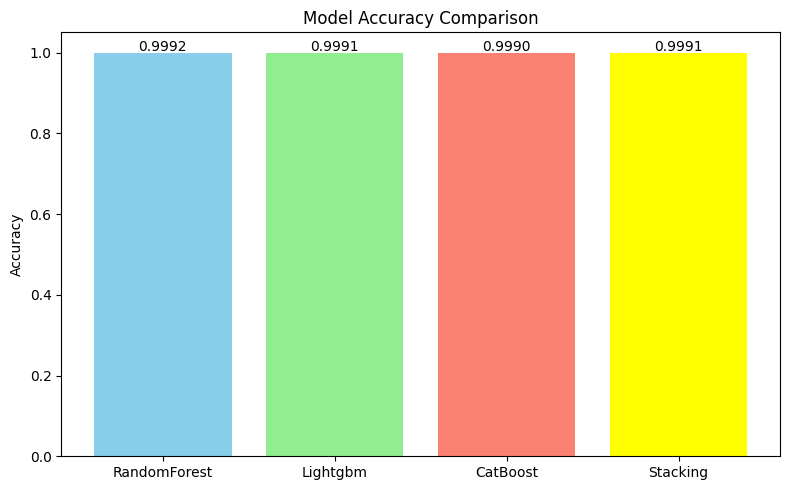

In [23]:
import matplotlib.pyplot as plt

# Extract names and scores
models = list(results.keys())
accuracies = [d['Accuracy'] for d in results.values()]  # Extract accuracy values

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=["skyblue", "lightgreen", "salmon", "yellow"])
plt.ylim(0, 1.05)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')


for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{acc:.4f}", ha='center')

# Save the plot
plt.tight_layout()
plt.savefig("ensemble_accuracy_comparison_bin_cicids.png", dpi=300)
plt.show()
